In [14]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
boston = load_boston()
print(boston_DESCR)

/Users/young/opt/anaconda3/envs/test1/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cali

NameError: name 'boston_DESCR' is not defined

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df['PRICE'] = boston.target

In [13]:
fig = px.histogram(df,x='PRICE')
fig.show()

<AxesSubplot:>

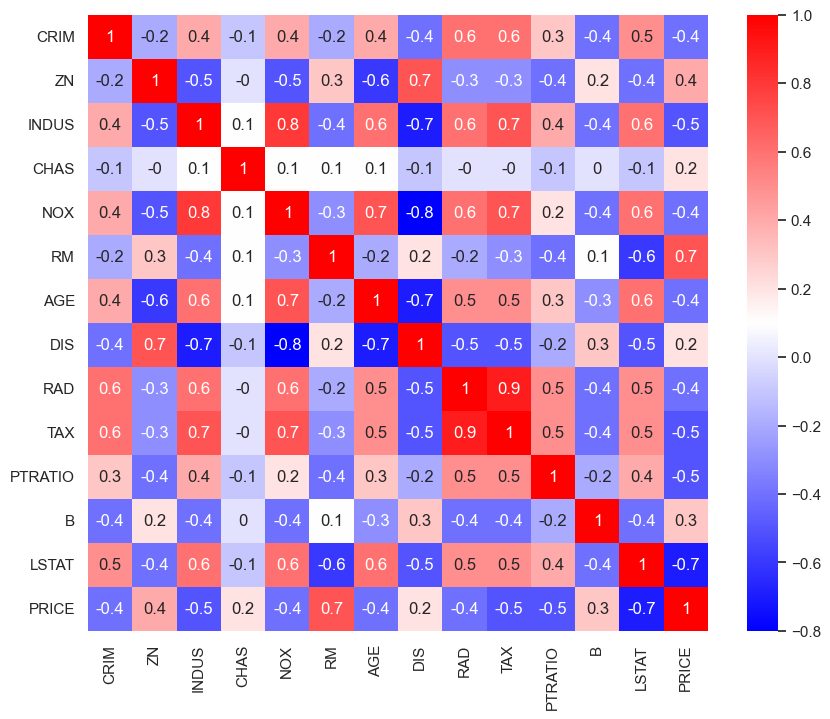

In [15]:
corr_mat = df.corr().round(1)
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data=corr_mat,annot=True,cmap='bwr')

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

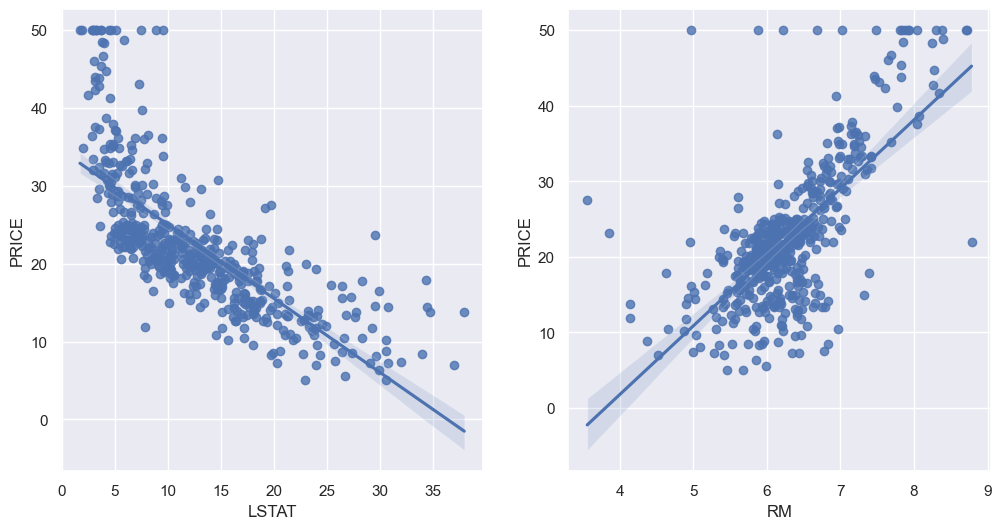

In [17]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12,6)})
fig,ax = plt.subplots(ncols=2)
sns.regplot(data=df,x='LSTAT',y='PRICE',ax=ax[0])
sns.regplot(data=df,x='RM',y='PRICE',ax=ax[1])

In [47]:
from sklearn.model_selection import train_test_split

X = df.drop('PRICE',axis=1)
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=13)



In [48]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [49]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_ts = reg.predict(X_test)
rmse_tr = np.sqrt(mean_squared_error(y_train,pred_tr))
rmse_ts = np.sqrt(mean_squared_error(y_test,pred_ts))
print(rmse_tr)
print(rmse_ts)

4.642806069019824
4.931352584146706


Text(0, 0.5, 'Predict price')

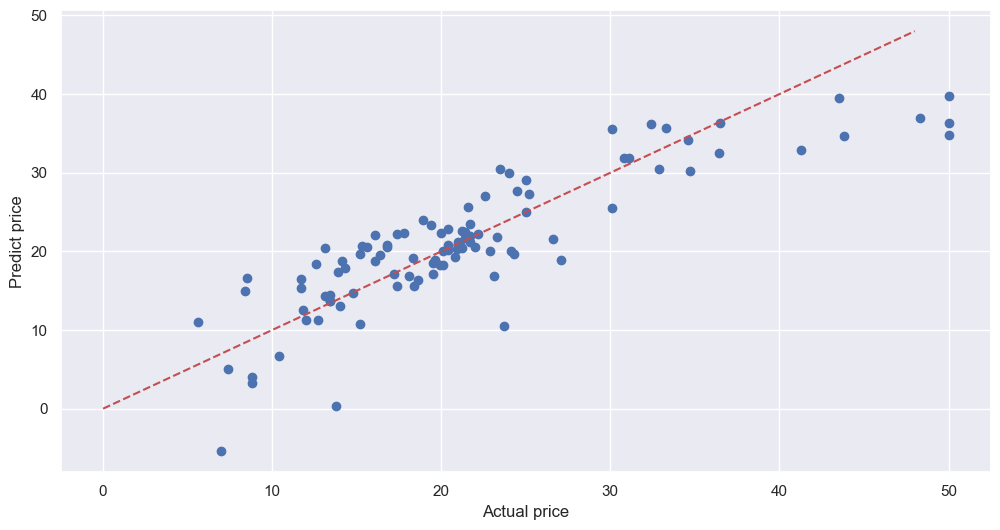

In [50]:
plt.scatter(y_test,pred_ts)
plt.plot([0,48],[0,48],'r',ls='dashed')
plt.xlabel('Actual price')
plt.ylabel('Predict price')

In [51]:
X = df[['RM','LSTAT']]
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=13)


In [52]:
reg = LinearRegression()
reg.fit(X_train,y_train)

pred_tr = reg.predict(X_train)
pred_ts = reg.predict(X_test)
rmse_tr = np.sqrt(mean_squared_error(y_train,pred_tr))
rmse_ts = np.sqrt(mean_squared_error(y_test,pred_ts))

print(rmse_tr)
print(rmse_ts)

5.496085641280111
5.634277122186757


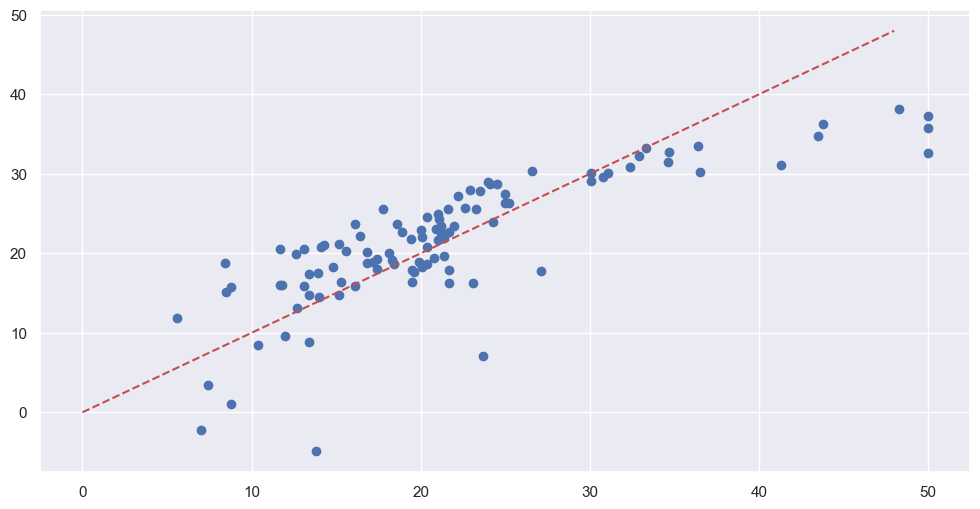

In [56]:
plt.scatter(y_test,pred_ts)
plt.plot([0,48],[0,48],'r',ls='dashed')